Data Description : Imagine being hungry in an unfamiliar part of town and getting restaurant recommendations served up, based on your personal preferences, at just the right moment. The recommendation comes with an attached discount from your credit card provider for a local place around the corner!

Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key.

Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

In this competition, Kagglers will develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty. Your input will improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers :)

![](https://storage.googleapis.com/kaggle-competitions/kaggle/10445/logos/thumb76_76.png?t=2018-10-24-17-14-05)

Reference 
- https://www.kaggle.com/youhanlee/hello-elo-ensemble-will-help-you
- https://www.kaggle.com/ashishpatel26/beginner-guide-of-elo-eda-kfold-lightgbm
- https://www.kaggle.com/kailex/tidy-elo-starter-3-813
- https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo

### Simple Exploration

In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
import os
print(os.listdir("../input"))

['test.csv', 'merchants.csv', 'train.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv', 'sample_submission.csv', 'historical_transactions.csv']


- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format - contains all card_ids you are expected to predict for.
- historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id
- merchants.csv - additional information about all merchants / merchant_ids in the dataset.
- new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

In [3]:
train = pd.read_csv("../input/train.csv", parse_dates=["first_active_month"])
print("shape of train : ",train.shape)

shape of train :  (201917, 6)


In [4]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


- first_active_month : ''YYYY-MM', month of first purchase
- feature_1,2,3 : Anonymized card categorical feature
- target : Loyalty numerical score calculated 2 months after historical and evaluation period

In [5]:
test = pd.read_csv("../input/test.csv", parse_dates=["first_active_month"])
print("shape of test : ",test.shape)

shape of test :  (123623, 5)


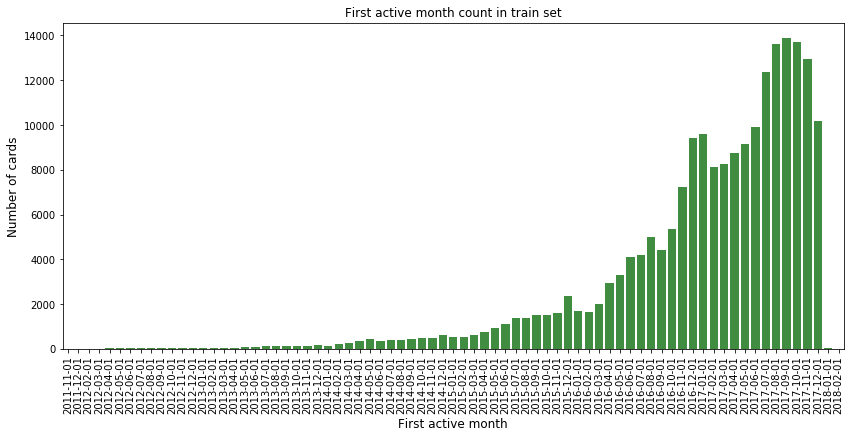

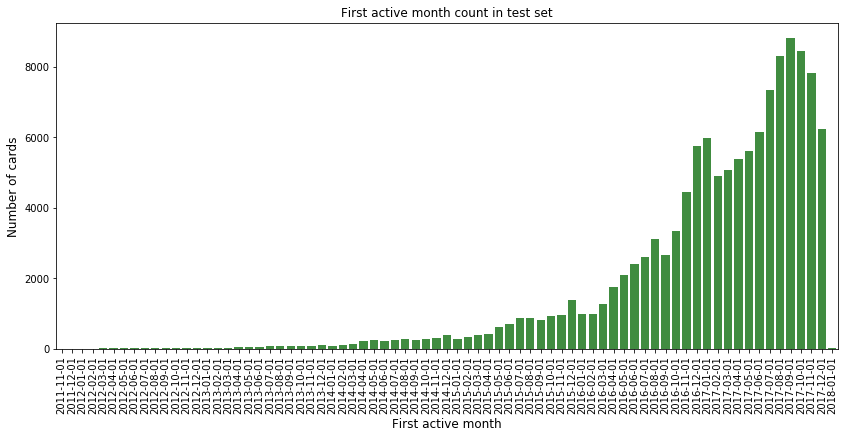

In [6]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 

cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

First_active_month of Train and Test looks similiar

In [7]:
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


`feature_1 - feature_3` has 0.58 but `target - feature` low correaltion value

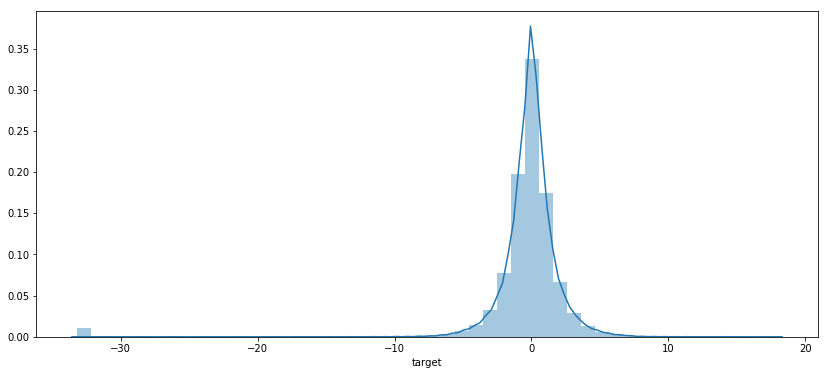

In [8]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(train['target'])

In [9]:
train['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

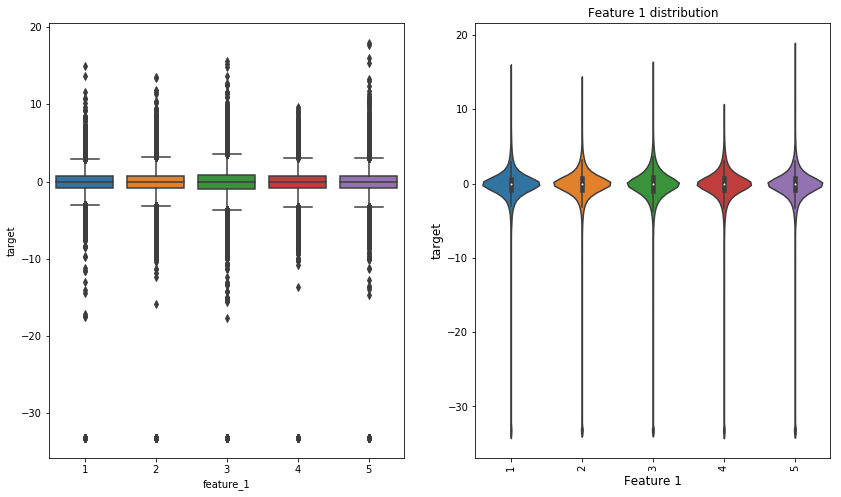

In [10]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_1']], axis=1)
fig = sns.boxplot(x='feature_1', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_1", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

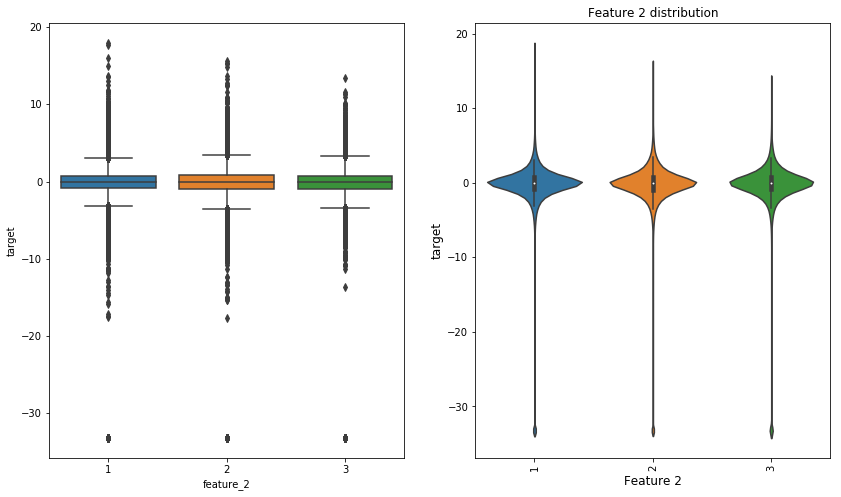

In [11]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_2']], axis=1)
fig = sns.boxplot(x='feature_2', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_2", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

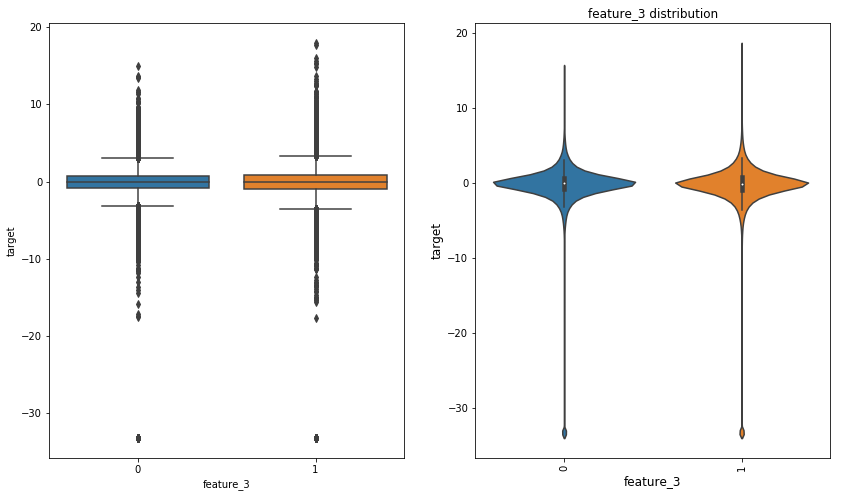

In [12]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_3']], axis=1)
fig = sns.boxplot(x='feature_3', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_3", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('feature_3', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("feature_3 distribution")
plt.show()

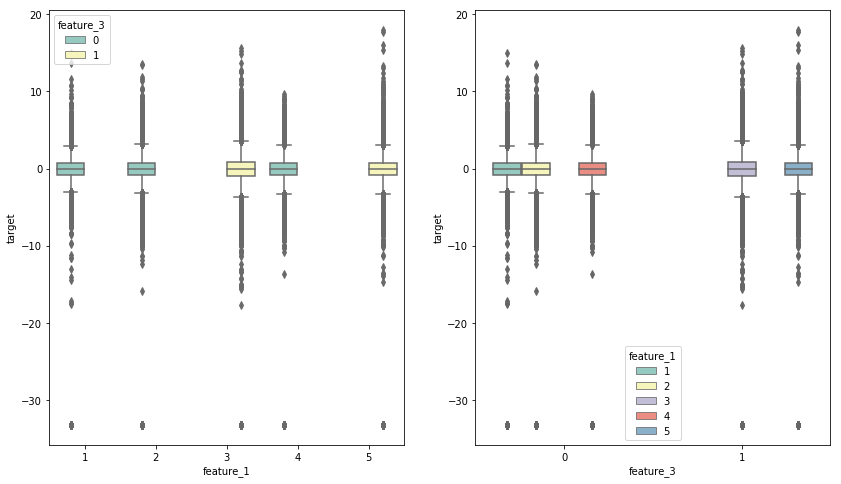

In [13]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_3",
               data=train, palette="Set3",ax=ax1)

sns.boxplot(x="feature_3", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2)

feature_3 has 1 when feautre_1 high than 3

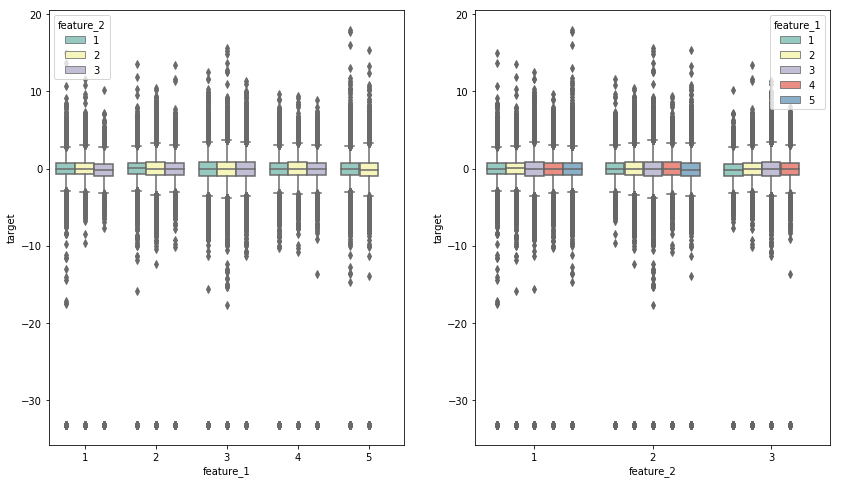

In [14]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_2",
               data=train, palette="Set3",ax=ax1)

sns.boxplot(x="feature_2", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2)

feature_2 has not 3 when feature_1 == 5
but what is target low than -30???

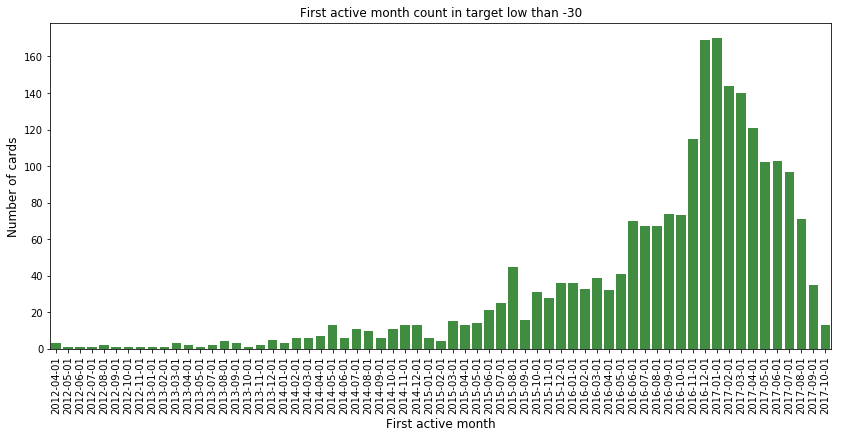

In [15]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 
train_low_m30 = train[train['target']<-30]
cnt_srs = train_low_m30['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in target low than -30")
plt.show()

In [16]:
train_low_m30.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281


### Missing value

In [17]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [18]:
# checking missing data
total = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
first_active_month,1,0.000809
feature_3,0,0.000000
feature_2,0,0.000000
feature_1,0,0.000000
card_id,0,0.000000


In [19]:
import datetime

for df in [train,test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

target = train['target']
del train['target']

In [20]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,year,month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,2017,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,2017,1,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,2016,8,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,2017,9,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,2017,11,92


### Simple Exploration : historical_transactions

In [21]:
ht = pd.read_csv("../input/historical_transactions.csv")
print("shape of historical_transactions : ",ht.shape)

shape of historical_transactions :  (29112361, 14)


In [22]:
ht.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


- card_id	: Card identifier
- month_lag	: month lag to reference date
- purchase_date	: Purchase date
- authorized_flag	: Y' if approved, 'N' if denied
- category_3	: anonymized category
- installments	: number of installments of purchase
- category_1 : 	anonymized category
- merchant_category_id	: Merchant category identifier (anonymized )
- subsector_id	: Merchant category group identifier (anonymized )
- merchant_id	: Merchant identifier (anonymized)
- purchase_amount	: Normalized purchase amount
- city_id	: City identifier (anonymized )
- state_id	: State identifier (anonymized )
- category_2 : anonymized category

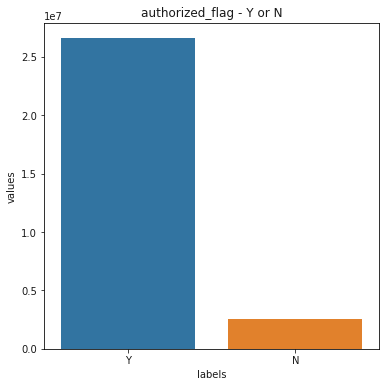

In [23]:
temp = ht["authorized_flag"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('authorized_flag - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

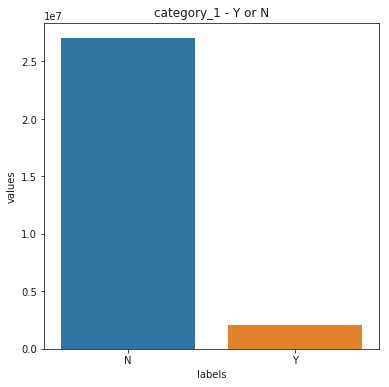

In [24]:
temp = ht["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

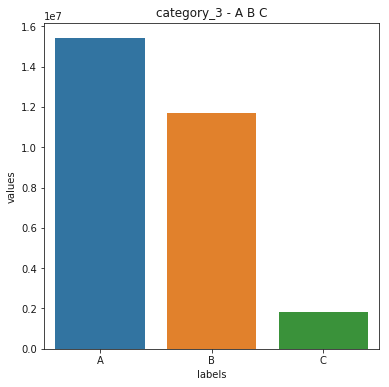

In [25]:
temp = ht["category_3"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_3 - A B C')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

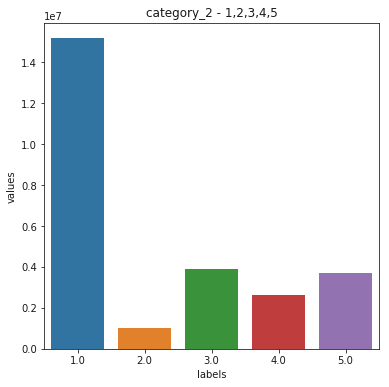

In [26]:
temp = ht["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 - 1,2,3,4,5')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

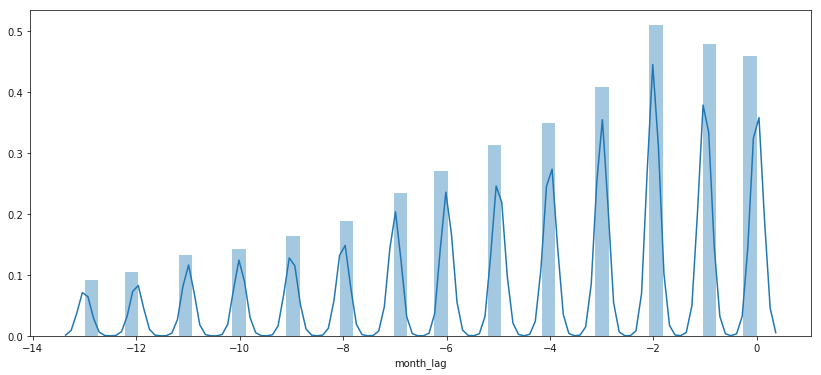

In [27]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['month_lag'])

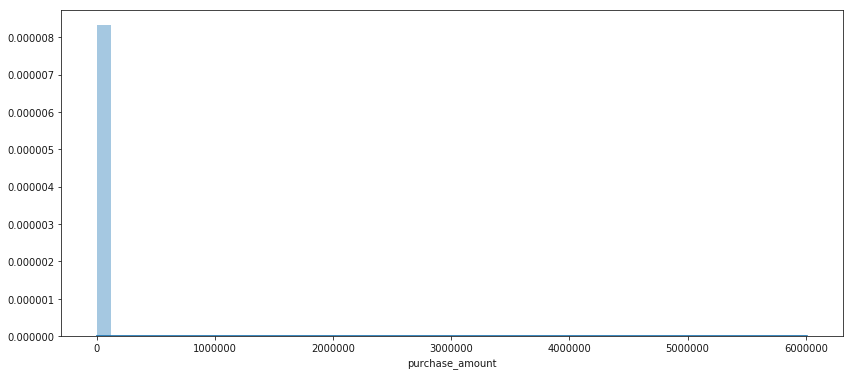

In [28]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['purchase_amount'])

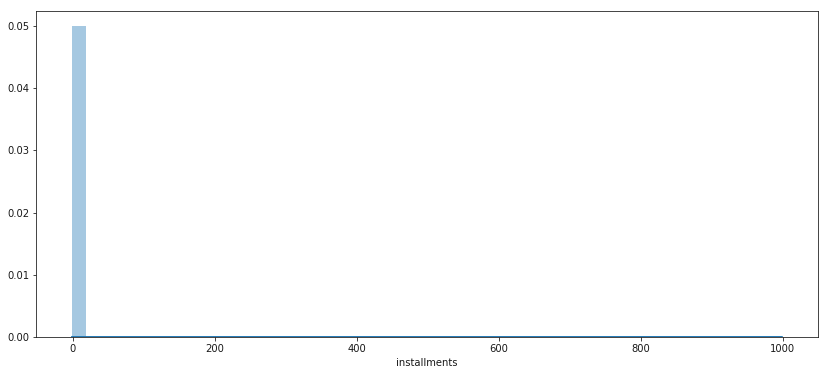

In [29]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['installments'])

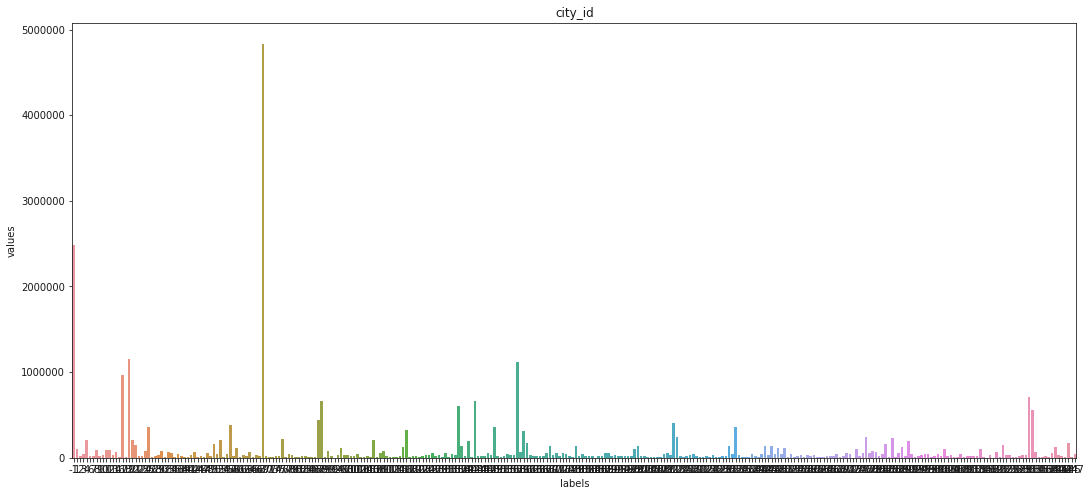

In [30]:
temp = ht["city_id"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (18,8))
plt.title('city_id')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [31]:
ht['authorized_flag'] = ht['authorized_flag'].map({'Y':1, 'N':0})

In [32]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

history = aggregate_historical_transactions(ht)
del ht
gc.collect()

2714

In [33]:
train = pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, history, on='card_id', how='left')

### Simple Exploration : merchants.csv

In [34]:
merchant = pd.read_csv("../input/merchants.csv")
print("shape of merchant : ",merchant.shape)

shape of merchant :  (334696, 22)


In [35]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


- merchant_id : Unique merchant identifier
- merchant_group_id	: Merchant group (anonymized )
- merchant_category_id	: Unique identifier for merchant category (anonymized )
- subsector_id	: Merchant category group (anonymized )
- numerical_1	: anonymized measure
- numerical_2	: anonymized measure
- category_1	: anonymized category
- most_recent_sales_range	: Range of revenue (monetary units) in last active month --> A > B > C > D > E
- most_recent_purchases_range	: Range of quantity of transactions in last active month --> A > B > C > D > E
- avg_sales_lag3	: Monthly average of revenue in last 3 months divided by revenue in last active month
- avg_purchases_lag3	: Monthly average of transactions in last 3 months divided by transactions in last active month
- active_months_lag3	: Quantity of active months within last 3 months
- avg_sales_lag6	: Monthly average of revenue in last 6 months divided by revenue in last active month
- avg_purchases_lag6	: Monthly average of transactions in last 6 months divided by transactions in last active month
- active_months_lag6	: Quantity of active months within last 6 months
- avg_sales_lag12	: Monthly average of revenue in last 12 months divided by revenue in last active month
- avg_purchases_lag12	: Monthly average of transactions in last 12 months divided by transactions in last active month
- active_months_lag12	: Quantity of active months within last 12 months
- category_4	: anonymized category
- city_id	: City identifier (anonymized )
- state_id	: State identifier (anonymized )
- category_2	: anonymized category

In [36]:
# checking missing data
total = merchant.isnull().sum().sort_values(ascending = False)
percent = (merchant.isnull().sum()/merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,11887,3.551581
avg_sales_lag3,13,0.003884
avg_sales_lag12,13,0.003884
avg_sales_lag6,13,0.003884
merchant_group_id,0,0.000000
merchant_category_id,0,0.000000
subsector_id,0,0.000000
numerical_1,0,0.000000
numerical_2,0,0.000000
category_1,0,0.000000


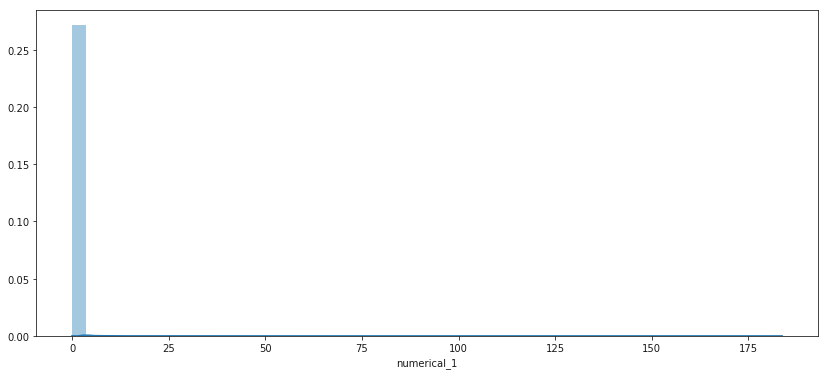

In [37]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_1'])

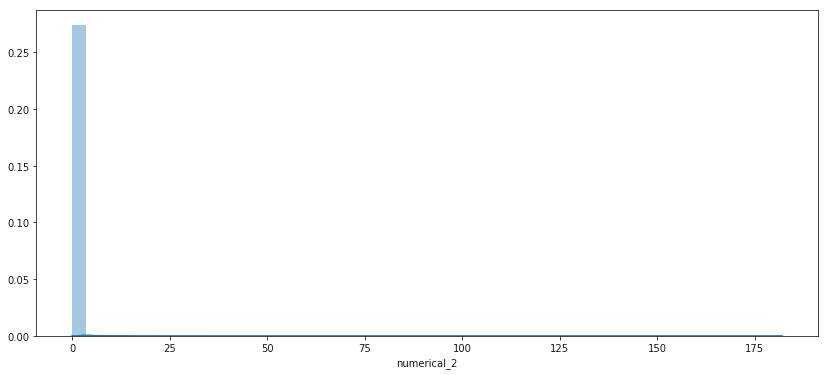

In [38]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(merchant['numerical_2'])

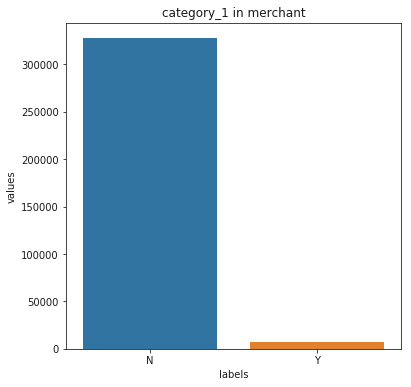

In [39]:
temp = merchant["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

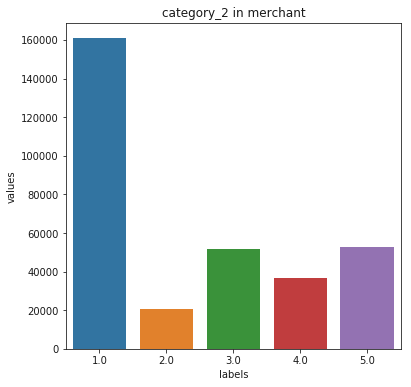

In [40]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

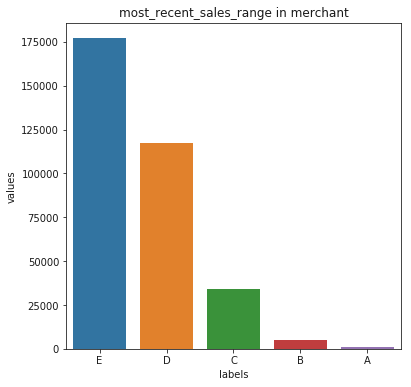

In [41]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["most_recent_sales_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_sales_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

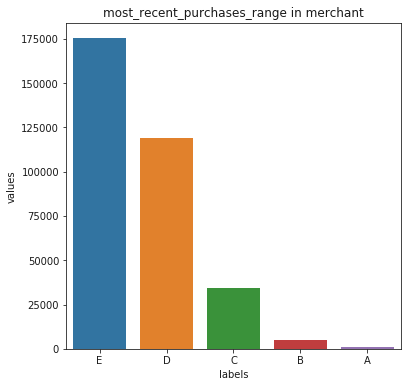

In [42]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["most_recent_purchases_range"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('most_recent_purchases_range in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

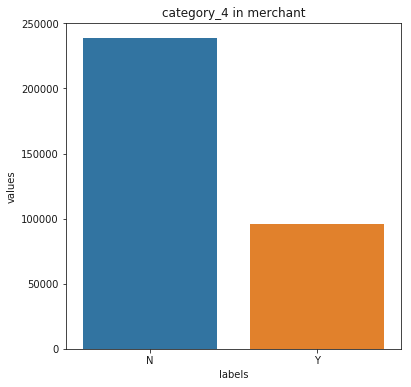

In [43]:
#most_recent_sales_range, most_recent_purchases_range, category_4
temp = merchant["category_4"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_4 in merchant')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

### Simple Exploration : new_merchants.csv

In [44]:
new_merchant = pd.read_csv("../input/new_merchant_transactions.csv")
print("shape of new_merchant_transactions : ",new_merchant.shape)

shape of new_merchant_transactions :  (1963031, 14)


In [45]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


- card_id	: Card identifier
- month_lag	: month lag to reference date
- purchase_date	: Purchase date
- authorized_flag	: Y' if approved, 'N' if denied
- category_3	: anonymized category
- installments	: number of installments of purchase
- category_1	: anonymized category
- merchant_category_id	: Merchant category identifier (anonymized )
- subsector_id	: Merchant category group identifier (anonymized )
- merchant_id	: Merchant identifier (anonymized)
- purchase_amount	: Normalized purchase amount
- city_id	: City identifier (anonymized )
- state_id	: State identifier (anonymized )
- category_2	: anonymized category


In [46]:
# checking missing data
total = new_merchant.isnull().sum().sort_values(ascending = False)
percent = (new_merchant.isnull().sum()/new_merchant.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
category_2,111745,5.692473
category_3,55922,2.848758
merchant_id,26216,1.335486
subsector_id,0,0.000000
state_id,0,0.000000
purchase_date,0,0.000000
purchase_amount,0,0.000000
month_lag,0,0.000000
merchant_category_id,0,0.000000
installments,0,0.000000


In [47]:
new_merchant['authorized_flag'] = new_merchant['authorized_flag'].map({'Y':1, 'N':0})

In [48]:
def aggregate_new_transactions(new_trans):    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'month_lag': ['min', 'max']
        }
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    agg_new_trans.columns = ['new_' + '_'.join(col).strip() 
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
    
    df = (new_trans.groupby('card_id')
          .size()
          .reset_index(name='new_transactions_count'))
    
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
    
    return agg_new_trans

new_trans = aggregate_new_transactions(new_merchant)

In [49]:
train = pd.merge(train, new_trans, on='card_id', how='left')
test = pd.merge(test, new_trans, on='card_id', how='left')

### Make a Baseline model
kernel : https://www.kaggle.com/youhanlee/hello-elo-ensemble-will-help-you

In [50]:
use_cols = [col for col in train.columns if col not in ['card_id', 'first_active_month']]

train = train[use_cols]
test = test[use_cols]

features = list(train[use_cols].columns)
categorical_feats = [col for col in features if 'feature_' in col]

In [51]:
for col in categorical_feats:
    print(col, 'have', train[col].value_counts().shape[0], 'categories.')

feature_1 have 5 categories.
feature_2 have 3 categories.
feature_3 have 2 categories.


In [52]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_feats:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

feature_1
feature_2
feature_3


In [53]:
df_all = pd.concat([train, test])
df_all = pd.get_dummies(df_all, columns=categorical_feats)

len_train = train.shape[0]

train = df_all[:len_train]
test = df_all[len_train:]

In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


lgb_params = {"objective" : "regression", "metric" : "rmse", 
               "max_depth": 11, "min_child_samples": 20, 
               "reg_alpha": 1, "reg_lambda": 1,
               "num_leaves" : 128, "learning_rate" : 0.005, 
               "subsample" : 0.8, "colsample_bytree" : 0.8, 
               "verbosity": -1}

FOLDs = KFold(n_splits=9, shuffle=True, random_state=1989)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))

features_lgb = list(train.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train)):
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 10000
    clf = lgb.train(lgb_params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 50)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)

    fold_importance_df_lgb = pd.DataFrame()
    fold_importance_df_lgb["feature"] = features_lgb
    fold_importance_df_lgb["importance"] = clf.feature_importance()
    fold_importance_df_lgb["fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df_lgb], axis=0)
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / FOLDs.n_splits
    

print(np.sqrt(mean_squared_error(oof_lgb, target)))

LGB 0--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.37542	valid_1's rmse: 3.85572
Early stopping, best iteration is:
[1135]	training's rmse: 3.35385	valid_1's rmse: 3.85487
LGB 1--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.40392	valid_1's rmse: 3.61389
Early stopping, best iteration is:
[1372]	training's rmse: 3.35407	valid_1's rmse: 3.61169
LGB 2--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.38765	valid_1's rmse: 3.74961
Early stopping, best iteration is:
[1047]	training's rmse: 3.37988	valid_1's rmse: 3.74955
LGB 3--------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[1000]	training's rmse: 3.41007	valid_1's rmse: 3.57906
Early stopping, best iteration 

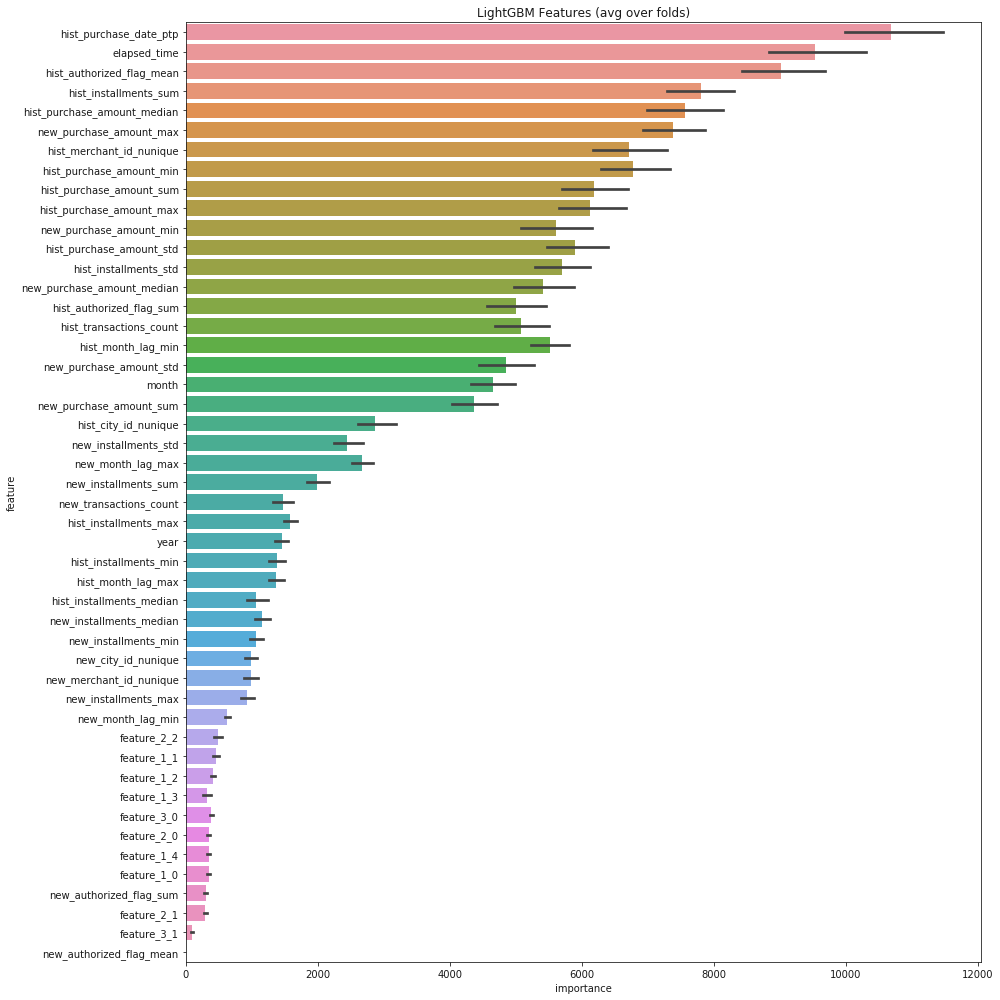

In [55]:
cols = (feature_importance_df_lgb[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df_lgb.loc[feature_importance_df_lgb.feature.isin(cols)]

plt.figure(figsize=(14,14))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [56]:
sub_df = pd.read_csv('../input/sample_submission.csv')
sub_df["target"] = predictions_lgb 
sub_df.to_csv("submission_lgb.csv", index=False)

In [57]:
import xgboost as xgb

xgb_params = {'eta': 0.005, 'max_depth': 11, 'subsample': 0.8, 'colsample_bytree': 0.8, 
          'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True}



FOLDs = KFold(n_splits=9, shuffle=True, random_state=1989)

oof_xgb = np.zeros(len(train))
predictions_xgb = np.zeros(len(test))


for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train)):
    trn_data = xgb.DMatrix(data=train.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = xgb.DMatrix(data=train.iloc[val_idx], label=target.iloc[val_idx])
    watchlist = [(trn_data, 'train'), (val_data, 'valid')]
    print("xgb " + str(fold_) + "-" * 50)
    num_round = 10000
    xgb_model = xgb.train(xgb_params, trn_data, num_round, watchlist, early_stopping_rounds=50, verbose_eval=1000)
    oof_xgb[val_idx] = xgb_model.predict(xgb.DMatrix(train.iloc[val_idx]), ntree_limit=xgb_model.best_ntree_limit+50)

    predictions_xgb += xgb_model.predict(xgb.DMatrix(test), ntree_limit=xgb_model.best_ntree_limit+50) / FOLDs.n_splits

np.sqrt(mean_squared_error(oof_xgb, target))

xgb 0--------------------------------------------------
[0]	train-rmse:3.92844	valid-rmse:4.10999
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[1000]	train-rmse:2.81164	valid-rmse:3.86382
Stopping. Best iteration:
[970]	train-rmse:2.82249	valid-rmse:3.86377

xgb 1--------------------------------------------------
[0]	train-rmse:3.96096	valid-rmse:3.85157
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[701]	train-rmse:2.96032	valid-rmse:3.61643

xgb 2--------------------------------------------------
[0]	train-rmse:3.94597	valid-rmse:3.97583
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[914]	train-rmse:2.85174	valid-rmse:3.7504

xgb 3---------

3.707720796326358

In [58]:
print('lgb', np.sqrt(mean_squared_error(oof_lgb, target)))
print('xgb', np.sqrt(mean_squared_error(oof_xgb, target)))

lgb 3.7026987410252654
xgb 3.707720796326358


In [59]:
total_sum = 0.5 * oof_lgb + 0.5 * oof_xgb
print("CV score: {:<8.5f}".format(mean_squared_error(total_sum, target)**0.5))

CV score: 3.70280 


In [60]:
sub_df = pd.read_csv('../input/sample_submission.csv')
sub_df["target"] = 0.5 * predictions_lgb + 0.5 * predictions_xgb
sub_df.to_csv("submission_ensemble.csv", index=False)